In [13]:
import mne
import numpy as np
import pandas as pd
from mne.decoding import CSP
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score, cross_val_predict 

In [2]:
subject = '15'
session = '1'
task = 'perception'
iterations = 50

In [3]:
datapoint = subject+'_'+session+ '_epo.fif'
modality_1 = 'audio'
modality_2 = 'pictorial'
modality_3 = 'orthographic'
if task == 'perception':
    event_tag = 'perc'
elif task == 'imagine':
    event_tag = 'imag'

In [4]:

path_audio = 'X:\\CompSci\\ResearchProjects\\EJONeill\\Neuroimaging\\multisensoryeeg\\processed_eeg\\epochs\\'+task+'_'+modality_1+'\\'
path_pictorial = 'X:\\CompSci\\ResearchProjects\\EJONeill\\Neuroimaging\\multisensoryeeg\\processed_eeg\\epochs\\'+task+'_'+modality_2+'\\'
path_ortho = 'X:\\CompSci\\ResearchProjects\\EJONeill\\Neuroimaging\\multisensoryeeg\\processed_eeg\\epochs\\'+task+'_'+modality_3+'\\'


#imagination_path_pictorial = 'X:\\CompSci\\ResearchProjects\\EJONeill\\Neuroimaging\\multisensoryeeg\\processed_eeg\\epochs\\imagine_'+modality_1+'\\'
#imagination_path_pictorial = 'X:\\CompSci\\ResearchProjects\\EJONeill\\Neuroimaging\\multisensoryeeg\\processed_eeg\\epochs\\imagine_'+modality_2+'\\'




audio_epochs = mne.read_epochs(path_audio + datapoint)
audio_events = mne.read_events(path_audio+ datapoint)
audio_epochs = audio_epochs.crop(tmin=0, tmax=2)

pictorial_epochs = mne.read_epochs(path_pictorial + datapoint)
pictorial_events = mne.read_events(path_pictorial+ datapoint)
pictorial_epochs = pictorial_epochs.crop(tmin=0, tmax=2)

ortho_epochs = mne.read_epochs(path_ortho + datapoint)
ortho_events = mne.read_events(path_ortho+ datapoint)
ortho_epochs = ortho_epochs.crop(tmin=0, tmax=2)



#imagination_epochs = mne.read_epochs(imagine_path + datapoint)
#imagination_events = mne.read_events(imagine_path+ datapoint)
#imagination_epochs = imagination_epochs.crop(tmin=0, tmax=2)

epochs = mne.concatenate_epochs([audio_epochs,pictorial_epochs,ortho_epochs])


Reading X:\CompSci\ResearchProjects\EJONeill\Neuroimaging\multisensoryeeg\processed_eeg\epochs\perception_audio\15_1_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    2000.00 ms
        0 CTF compensation matrices available
Not setting metadata
87 matching events found
No baseline correction applied
0 projection items activated
Reading X:\CompSci\ResearchProjects\EJONeill\Neuroimaging\multisensoryeeg\processed_eeg\epochs\perception_pictorial\15_1_epo.fif ...


C:\Users\hlw69\AppData\Local\Temp\ipykernel_16624\2488082779.py:13: RuntimeWarning: This filename (X:\CompSci\ResearchProjects\EJONeill\Neuroimaging\multisensoryeeg\processed_eeg\epochs\perception_audio\15_1_epo.fif) does not conform to MNE naming conventions. All events files should end with .eve, -eve.fif, -eve.fif.gz, -eve.lst, -eve.txt, _eve.fif, _eve.fif.gz, _eve.lst, _eve.txt or -annot.fif
  audio_events = mne.read_events(path_audio+ datapoint)


    Found the data of interest:
        t =       0.00 ...    3000.00 ms
        0 CTF compensation matrices available
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated


C:\Users\hlw69\AppData\Local\Temp\ipykernel_16624\2488082779.py:17: RuntimeWarning: This filename (X:\CompSci\ResearchProjects\EJONeill\Neuroimaging\multisensoryeeg\processed_eeg\epochs\perception_pictorial\15_1_epo.fif) does not conform to MNE naming conventions. All events files should end with .eve, -eve.fif, -eve.fif.gz, -eve.lst, -eve.txt, _eve.fif, _eve.fif.gz, _eve.lst, _eve.txt or -annot.fif
  pictorial_events = mne.read_events(path_pictorial+ datapoint)


Reading X:\CompSci\ResearchProjects\EJONeill\Neuroimaging\multisensoryeeg\processed_eeg\epochs\perception_orthographic\15_1_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    3000.00 ms
        0 CTF compensation matrices available
Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated


C:\Users\hlw69\AppData\Local\Temp\ipykernel_16624\2488082779.py:21: RuntimeWarning: This filename (X:\CompSci\ResearchProjects\EJONeill\Neuroimaging\multisensoryeeg\processed_eeg\epochs\perception_orthographic\15_1_epo.fif) does not conform to MNE naming conventions. All events files should end with .eve, -eve.fif, -eve.fif.gz, -eve.lst, -eve.txt, _eve.fif, _eve.fif.gz, _eve.lst, _eve.txt or -annot.fif
  ortho_events = mne.read_events(path_ortho+ datapoint)
C:\Users\hlw69\AppData\Local\Temp\ipykernel_16624\2488082779.py:30: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs([audio_epochs,pictorial_epochs,ortho_epochs])


Not setting metadata
266 matching events found
No baseline correction applied


### Edit event info below based on what sensory modality classifying

In [5]:
print(audio_epochs.event_id, pictorial_epochs.event_id, ortho_epochs.event_id)

{'perc_flower_s': 315, 'perc_penguin_s': 316, 'perc_guitar_s': 317} {'perc_flower_p': 312, 'perc_penguin_p': 313, 'perc_guitar_p': 314} {'perc_flower_t': 309, 'perc_penguin_t': 310, 'perc_guitar_t': 311}


In [6]:
epochs = mne.epochs.combine_event_ids(epochs, old_event_ids = [event_tag+'_penguin_s',event_tag+'_flower_s',event_tag+'_guitar_s'],new_event_id = {'audio':1})#, perc_flower_p, {'perc_flower_p': 312}, copy = False)
epochs = mne.epochs.combine_event_ids(epochs, old_event_ids = [event_tag+'_penguin_p',event_tag+'_flower_p',event_tag+'_guitar_p'], new_event_id = {'pictorial':0})
epochs = mne.epochs.combine_event_ids(epochs, old_event_ids = [event_tag+'_penguin_t',event_tag+'_flower_t',event_tag+'_guitar_t'], new_event_id = {'orthographic':2})
print(epochs)


<Epochs |  266 events (all good), 0 - 2 sec, baseline off, ~515.8 MB, data loaded,
 'audio': 87
 'pictorial': 100
 'orthographic': 79>


In [7]:
labels = epochs.events[:, -1]
print(labels)
#print(epochs.shape[2])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2]


In [ ]:
#from numpy.random import seed
#from numpy.random import randn
#from matplotlib import pyplot
#epochs_data = epochs.get_data()
#epochs_data = np.reshape(epochs_data, (epochs_data.shape[0], epochs_data.shape[1]* epochs_data.shape[2]))
# seed the random number generator
#seed(1)
# generate univariate observations
#data = 5 * randn(100) + 50
# histogram plot
#pyplot.hist(epochs_data)
#pyplot.show()

In [ ]:
# pyriemmann implementation
#from pyriemann.classification import MDM
#from pyriemann.estimation import Covariances
#from sklearn.model_selection import KFold
#epochs_data = epochs.get_data()
#cv = ShuffleSplit(10, test_size=0.2, random_state=42)
#cv_split = cv.split(epochs_data)
#cv = KFold(n_splits=10,shuffle=True,random_state=42)

#cov_data_train = Covariances().transform(epochs_data)
#mdm = MDM(metric=dict(mean = 'riemann', distance='riemann'))
#scores = cross_val_score(clf, cov_data_train, labels, cv=cv, n_jobs=None)
                     

psd created
Classifier = [0.68518519 0.60377358 0.73584906 0.67924528 0.67924528]. Mean accuracy = 0.6766596785464709
Classifier = [0.55555556 0.66037736 0.64150943 0.83018868 0.67924528]. Mean accuracy = 0.6733752620545073


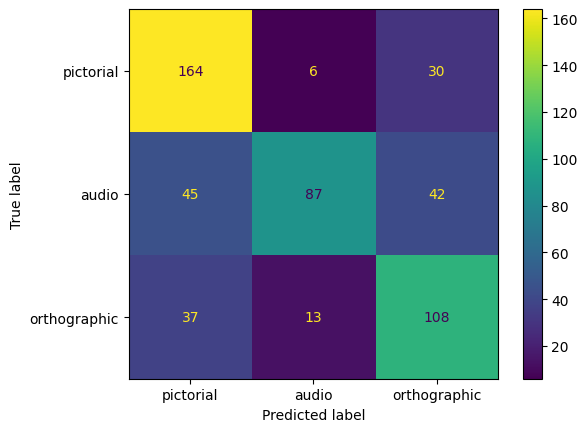

In [29]:
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.pipeline import make_pipeline
from mne.decoding import CSP, Scaler, Vectorizer, cross_val_multiscore,PSDEstimator,UnsupervisedSpatialFilter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



#data = decomposed_data
data =  epochs.get_data()
#data = data.reshape(data.shape[0],data.shape[1]*data.shape[2])
#print("Should be 2D if using XGBoost ", data.shape)
#X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

#psd = mne.decoding.PSDEstimator()

csp = CSP(n_components=4, norm_trace=False, reg = 'empirical')
print("psd created")

#model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

clf = make_pipeline(
  #  model
    Scaler(epochs.info),
  #  psd,
 #   UnsupervisedSpatialFilter(PCA(124), average=False),  # this has to be done due to this error: https://github.com/mne-tools/mne-python/issues/9094
#    csp,
    Vectorizer(),
   # svm.SVC()
    LogisticRegression(solver='liblinear')  # liblinear is faster than lbfgs
)

predictions_all = []
labels_all = []
accuracies = []
from random import randint # ensure that different random_state each time
for i in range(iterations):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=randint(1,50))
    #clf = AdaBoostClassifier(n_estimators=100)
    scores = cross_val_score(clf, data, labels, cv=cv)
    predictions = cross_val_predict(clf, data, labels, cv=cv)
    predictions_all = predictions_all+ predictions.tolist()
    labels_all=labels_all+ labels.tolist()
    
    print(f"Classifier = {scores}. Mean accuracy = {scores.mean()}")
    accuracies.append(scores)
    
conf_mat = confusion_matrix(labels_all, predictions_all)
cmd = ConfusionMatrixDisplay(conf_mat, display_labels=['pictorial','audio', 'orthographic'])
#cmd.plot()
#plt.show()


In [27]:
print(labels_all)

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

results for  15_1 using  [('vectorizer', <mne.decoding.transformer.Vectorizer object at 0x000001EB5507A310>), ('logisticregression', LogisticRegression(solver='liblinear'))]  are mean and std  0.6750174703004891 0.06972772279259698


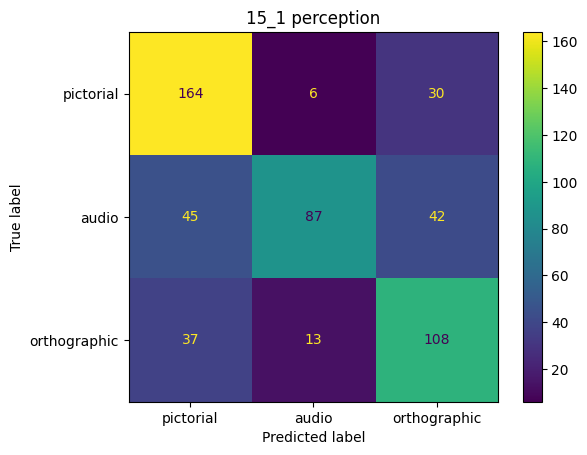

In [36]:
id = subject+'_'+session
pipe = clf.steps[1:]
std = str(np.std(accuracies))
mean = str(np.mean(accuracies))
notes = "06/012/ running to put in thesis"
print("results for ", id, "using ", pipe, " are mean and std ", mean, std)
with open('classify_sensory_'+task+'.csv','a') as fd:
  #  fd.write(str(np.mean(accuracies)))
    fd.write(f"{id}, {pipe},{mean}, {std}, {iterations}\n")
cmd.plot()
plt.title(id+ ' '+task)
plt.savefig(id+ '_'+task+'_confusionmatrix.png')

#plt.show()